In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
#Read xmap file into dataframe and trasfer relevant arguments to bedfile
xmap=pd.read_csv(r"C:\Users\Assaf\Documents\postdoctoral TAU\xmap_filter_17_60min.conf.17.min.alignment.60.xmap", sep='\t', header=None, skiprows=8)
xmap.columns = xmap.iloc[0]
xmap.head(10)
xmap.dtypes
xmapr=xmap.iloc[2:]
xmapr.head()
bedtable=xmapr[['RefContigID','RefStartPos', 'RefEndPos','Orientation']]
bedtable['RefContigID']=bedtable['RefContigID'].astype(str)
bedtable['RefContigID']=("chr"+ bedtable['RefContigID'])
bedtable['RefStartPos']=bedtable['RefStartPos'].astype(float)
bedtable['RefEndPos']=bedtable['RefEndPos'].astype(float)
bedtable['RefEndPos']=bedtable['RefEndPos'].astype(int)
bedtable['RefStartPos']=bedtable['RefStartPos'].astype(int)
bedtable['RefContigID']=bedtable['RefContigID'].replace({'chr23':'chrX', 'chr24':'chrY' })
bedtable.to_csv(r"C:\Users\Assaf\Documents\postdoctoral TAU\xmap_filter_17_60min.conf.17.min.alignment.60.bed", index=False, header=False, sep='\t')

c:\users\assaf\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0,1,2,3,4,5,6,8,10,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [169]:
bedtable.head()

,RefContigID,RefStartPos,RefEndPos,Orientation
2,chr1,354037,475396,-
3,chr1,354037,535206,-
4,chr1,354037,588217,-
5,chr1,365535,535206,-
6,chr1,525250,826053,-


In [11]:
#Group bedgrapph by coverage values to generate histogram 
his=pd.read_csv(r"C:\Users\Assaf\Documents\postdoctoral TAU\Naked_xmap_filter_17_60_min.conf.17.min.alignment.60.bedgraph",names=["chr", "Start", "End", "Coverage"], sep='\t')
his['lenght']=(his['End']-his['Start'])
f=his.groupby(['Coverage'])['lenght'].sum()

In [194]:
# run this cell to filter bedgraph by coverage value, change the value of the coverage you want in the next line
cov_threshold=11
is_above_threshold =  his['Coverage']>=cov_threshold
his_filter = his[is_above_threshold]
his_filter.to_csv(r"C:\Users\Assaf\Documents\postdoctoral TAU\cov_filtered_bedgraph_ilter_17_60min.conf.17.min.bed", index=False, header=False, sep='\t')


In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

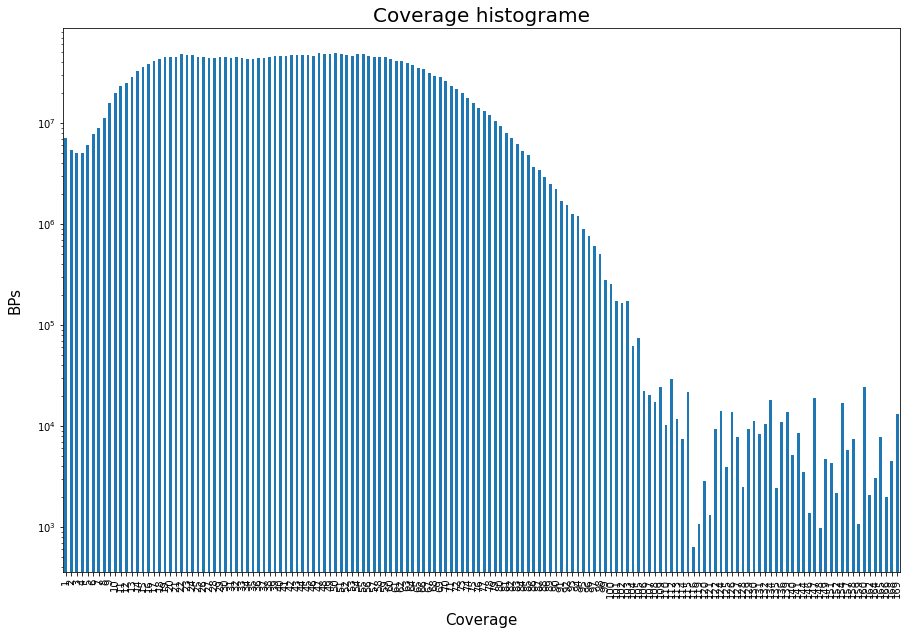

In [6]:
f.plot(kind='bar', figsize=(15, 10))

plt.xlabel('Coverage', fontsize=15, labelpad=15) # add to x-label to the plot
plt.ylabel('BPs', fontsize=15, labelpad=15) # add y-label to the plot
plt.rc('xtick', labelsize=15)
plt.title('Coverage histograme', fontsize=20) # add title to the plot
plt.yscale('log')
#plt.show()
plt.savefig(r"C:\Users\Assaf\Documents\postdoctoral TAU\xmapfig4.jpg")

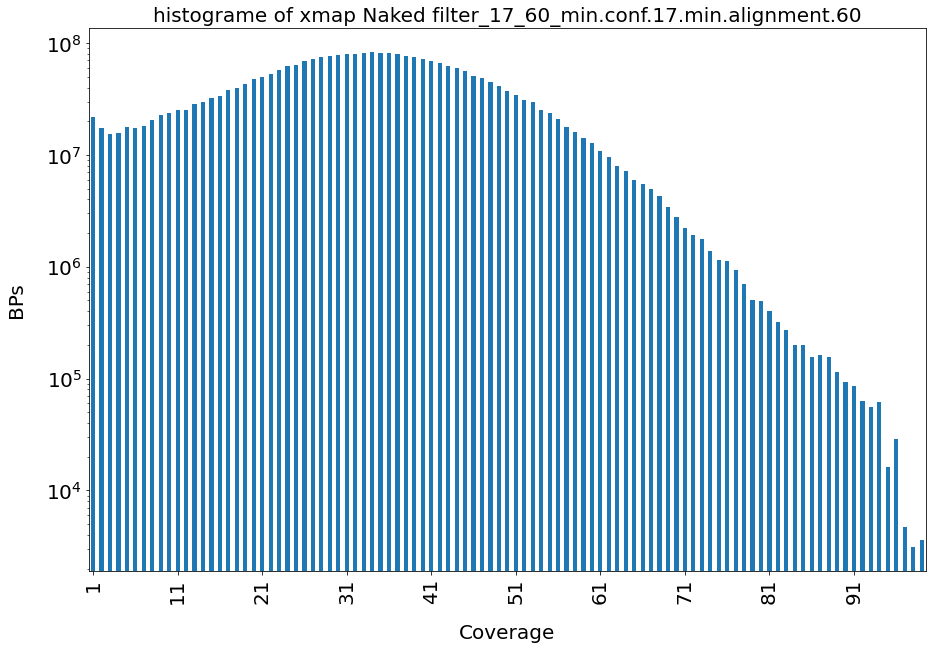

In [15]:
# Plot number of bp per coverage value histogram
f.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Coverage', fontsize=20, labelpad=20) # add to x-label to the plot
plt.ylabel('BPs', fontsize=20, labelpad=20) # add y-label to the plot
D = range(0,100,10)
plt.xticks(D, fontsize=20, rotation='vertical')
plt.yticks(fontsize=20)
plt.title('histograme of xmap Naked filter_17_60_min.conf.17.min.alignment.60', fontsize=20) # add title to the plot
plt.yscale('log')
#plt.show()
plt.savefig(r"C:\Users\Assaf\Documents\postdoctoral TAU\Naked_xmap_filter_17_60_min.conf.17.min.alignment.60.jpg")

In [164]:
! jupyter nbconvert --to html xmap_to_bedgraph.ipynb.

[NbConvertApp] Converting notebook xmap_to_bedgraph.ipynb. to html
[NbConvertApp] Writing 600165 bytes to xmap_to_bedgraph.ipynb.html
